

<div>
  <img src="imagens/logo_jr.png" width="100" height="75" style="float:right">
  <h1>Código para analise da base de dados</h1>
    <p>Autores: Luigi Orlandi, Pedro Mahfuz, Theo Decourt</p>
</div>

In [1]:
# Importando Bibliotecas
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Abrindo a base de dados


In [2]:
# Leitura do arquivo .xlsx
filename = pathlib.Path.cwd() / 'Base_MindMiners.xlsx'
db = pd.read_excel('Base_MindMiners.xlsx')

# Segunda tabela com respostas
df = pd.read_excel('Base_MindMiners.xlsx', sheet_name='Pesquisa-Respostas')

# Limpeza da base de dados

### Removendo colunas vazias e normalizando indexes

In [7]:
# Remover as colunas com índices 'Unnamed'
df = df.drop(columns=[coluna for coluna in df.columns if coluna.startswith('Unnamed:')])

In [9]:
# Usando a função split para remover espaços nos indexes das colunas
df.columns = df.columns.str.strip()

In [10]:
# # Usando a função str.replace para remover "." dos indexes das colunas
df.columns = df.columns.str.replace(".", "")

C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_14584\2669726975.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "")


### Removendo conteudo indesejado das colunas


In [11]:
# Lista com todas as colunas
nomes = list(df)

In [12]:
# Primeria coluna
df.loc[~df.loc[:, nomes[0]].isin(range(1,6)), nomes[0]] = None

In [13]:
# Seguna coluna
df.loc[~df.loc[:, nomes[1]].isin(range(1,9)), nomes[1]] = None

In [14]:
# Coluna 3 a 58
for coluna in range(2, 58):
    df.loc[~df.loc[:, nomes[coluna]].isin(range(1,8)), nomes[coluna]] = None

In [15]:
# Coluna Qesc
df.loc[~df.loc[:, nomes[58]].isin(range(1,7)), nomes[58]] = None

In [16]:
# Coluna Qnat
df.loc[~df.loc[:, nomes[60]].isin(range(0,6)), nomes[60]] = None

In [17]:
# Coluna Qcama
df.loc[~df.loc[:, nomes[62]].isin(range(0,5)), nomes[62]] = None

In [18]:
# Coluna Qche
lista_quinta_feira = ["Quinta-Feira", "Quinta Feira", "quinta-Feira", "quintaFeira"]
df.loc[df.loc[:, nomes[64]].isin(lista_quinta_feira), nomes[64]] = 'Quinta-Feira'

# Primeira análise dos dados

### Preparando o banco de dados para a análise exploratória

In [59]:
# Criando uma copia do banco de dados original para fazer a análise exploratória
df_ae = df.copy()

In [60]:
# Frequência de viagem
df_ae['P1'] = df_ae['P1'].astype('category')
df_ae['P1'].cat.categories = ['1 a 3', '4 a 6', '7 a 10', '10+', 'Não Viaja']

# Faixa etaria
df_ae['Qid'] = df_ae['Qid'].astype('category')
df_ae['Qid'].cat.categories = ['18-', '18 a 24', '25 a 34', '35 a 44', '45 a 54', '55+']

# Estadia media
df_ae['Qesc'] = df_ae['Qesc'].astype(float)

# Numero de filhos
df_ae['Qnat'] = df_ae['Qnat'].astype(float)

# Regiao
df_ae['Qreg'] = df_ae['Qreg'].astype('category')
df_ae['Qreg'].cat.categories = ['Sudeste', 'Sul', 'Centro Oeste', 'Nordeste', 'Norte']

# Gênero
df_ae['Qgen'] = df_ae['Qgen'].astype('category')
df_ae['Qgen'].cat.categories = ['Masculino', 'Feminino']

# Número de filhos
df_ae['Qnat'] = df_ae['Qnat'].astype(float)

# Motivo viagem
df_ae['P2'] = df_ae['P2'].astype('category')
df_ae['P2'].cat.categories = ['Visitar amigos', 'Visitar familia', 'Lazer', 'Pesquisa Ciêntifica', 'Trabalho', 'Viagem gastronomica', 'Desconectar'] 


In [23]:
# Separamos as colunas que acreditamos serem as mais importantes para definir o público-alvo¶
# Exclamações indicam as variáveis que consideramos mais importantes

freq_de_viagem = df_ae['P1'] # qualitativa   !!!!!
faixa_etaria = df_ae['Qid'] # qualitativa 
nivel_escolaridade = df_ae['Qesc'] # qualitativa
motivo_viagem = df_ae['P2'] # qualitativa    !!!!!!
classe = df_ae['Qclasse'] # qualitativa
genero = df_ae['Qgen'] # qualitativa
estado_civil = df_ae['Qciv'] # qualitativa
filhos = df_ae['Qnat'] # quantitativa
estadia_media = df_ae['Qest'] # quantitativa   !!!!!!
regiao = df_ae['Qreg'] # qualitativa

#quantitativa e qualitativa --> histograma e boxplot
#qualitativa e qualitativa --> tabela cruzada e grafico de barra
#quantitativa e quantitativa --> gráfico de dispersão

# Análise exploratória
<p> Nossa ideia inicial é ver qual é o "tipo de pessoa" que viaja com mais frequência. Além disso, fizemos algumas outras análises para obter informações importantes a respeito do banco de dados. </p>

In [24]:
# Cores
cores = ['lightcoral', 'yellow', 'darkgoldenrod', 'limegreen', 'dodgerblue', 'purple', 'red']
cores2 = [ 'pink', 'blue', 'yellow']
cores3 = ['blue', 'red']

## Gráfico de barras de frequência de viagem por faixa etária

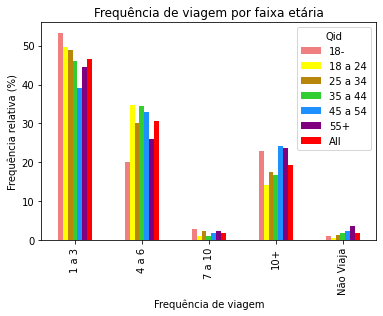

In [26]:
freq_x_idade = pd.crosstab(freq_de_viagem, faixa_etaria, normalize = 'columns', margins = True).round(3)*100

freq_x_idade.plot.bar(color = cores)
plt.title('Frequência de viagem por faixa etária')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
plt.show()

## Boxplot da frequência de viagem pela estadia média

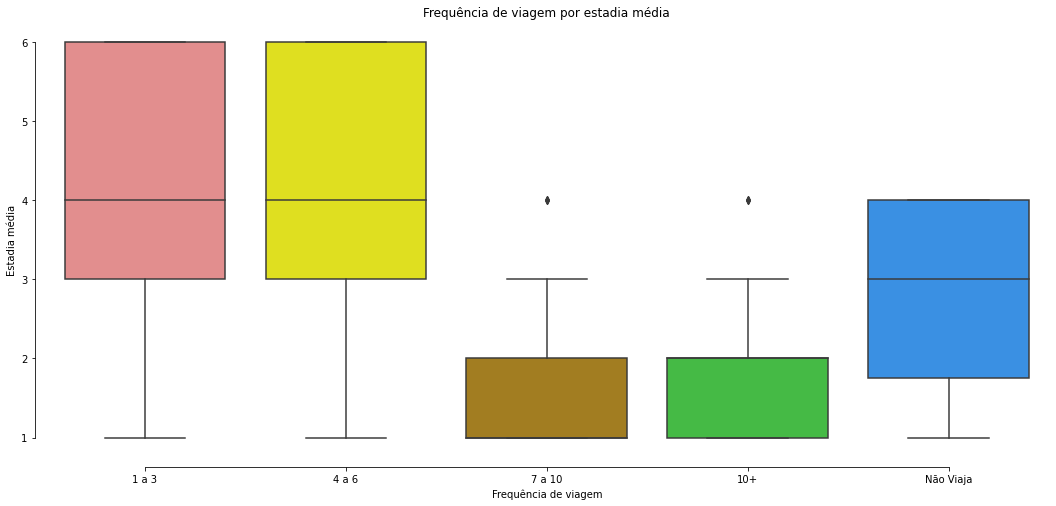

In [27]:
plt.figure(figsize=(18,8))

sns.boxplot(x=freq_de_viagem,                                              # Eixo X receberá os grupos.
            y=estadia_media,                                                   # Hue colore o gráfico de acordo com outra variável categórica
                                                                             # neste caso o gênero
            palette=cores,                                              # Paleta de cores neste caos 'm', magenta e 'g' verde
                                                                             # no eixo X.
            data=df_ae)                                                       # Dados

plt.title('Frequência de viagem por estadia média')
plt.xlabel('Frequência de viagem')
plt.ylabel('Estadia média')
sns.despine(offset=10, trim=True)

## Gráfico de barras de frequência de viagem por região

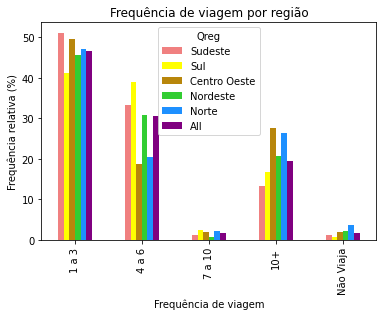

In [28]:
freq_x_regiao = pd.crosstab(freq_de_viagem, regiao, normalize = 'columns', margins = True).round(3)*100

#normalize = index --> Ex: Freq.A: sudeste + sul + nordeste + centro oeste = 100%
#normalize = columns --> Ex: Sudeste - freq.A + sudeste - freq.B + sudeste - freq.C - 100%

freq_x_regiao.plot.bar(color = cores)
plt.title('Frequência de viagem por região')
plt.ylabel('Frequência relativa (%)')
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

## Gráfico de barras de frequência de viagem por gênero

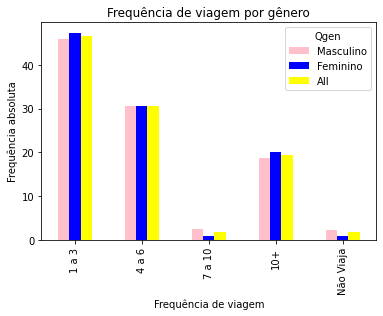

In [29]:
freq_x_gen = pd.crosstab(freq_de_viagem, genero, normalize = 'columns', margins = True).round(3)*100

freq_x_gen.plot.bar(color = cores2)
plt.title('Frequência de viagem por gênero')
plt.ylabel('Frequência absoluta') #Frequência absoluta já que o número de homens e mulheres é muito parecido
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

# Gráfico de barras de frequência de viagem por classe

freq_x_classe = pd.crosstab(freq_de_viagem, classe, normalize = 'columns', margins = True).round(3)*100

freq_x_classe.plot.bar(color = cores)
plt.title('Frequência de viagem por classe')
plt.ylabel('Frequência absoluta') #Frequência absoluta já que o número de homens e mulheres é muito parecido
plt.xlabel('Frequência de viagem')
#plt.legend(loc='center')
plt.show()

## Boxplot da frequência de viagem pelo numero de filhos

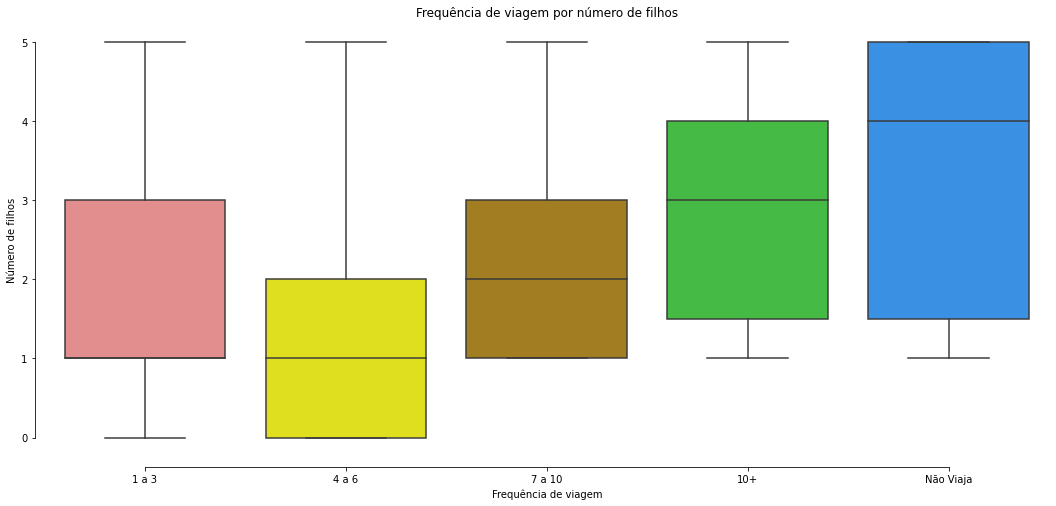

In [31]:

plt.figure(figsize=(18,8))

sns.boxplot(x=freq_de_viagem,                                              # Eixo X receberá os grupos.
            y=filhos,                                                   # Hue colore o gráfico de acordo com outra variável categórica
                                                                             # neste caso o gênero
            palette=cores,                                              # Paleta de cores neste caos 'm', magenta e 'g' verde
                                                                             # no eixo X.
            data=df_ae)                                                       # Dados

plt.title('Frequência de viagem por número de filhos')
plt.xlabel('Frequência de viagem')
plt.ylabel('Número de filhos')
sns.despine(offset=10, trim=True)

#### Para as seguintes análises decidimos criar um dataframe novo apenas com as famílias, ou seja, com as pessoas casadas que tem pelo menos um filho, e outro dataframe com as pessoas que não são casadas

In [32]:
df_familia = df_ae.copy()

# Filtrando apenas as familias
casados = df_ae['Qciv'] == 'Casado'
filhos = df_ae['Qnat'].isin(range(1,6))

# Criando um banco de dados apenas com as familias
df_familia = df_familia.loc[casados & filhos, :]


In [33]:
df_nao_familia = df_ae.copy()

# # Filtrando apenas as "não familias"
nao_casados = df_ae['Qciv'] != 'Casado'

# Criando um banco de dados apenas com as "não familias"
df_nao_familia = df_ae.loc[nao_casados, :]


In [34]:
# Tempo de estadia, em porcentagem, de uma familia e de uma "não familia"

df_familia['Estadia_familia'] = df_familia['Qest'] #essa mudanca de nome esta causando o erro
estadia_familia = (df_familia['Estadia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']
estadia_nao_familia = (df_nao_familia['Estadia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

Qest_familia_x_naofamilia = pd.concat([estadia_familia, estadia_nao_familia], axis=1)
print(Qest_familia_x_naofamilia)

     Estadia_familia  Estadia_nao_familia
4.0            39.87                12.30
6.0             5.70                41.41
1.0             8.86                16.80
3.0            40.51                11.52
2.0             5.06                17.97


C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_14584\1043923398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Estadia_nao_familia'] = df_nao_familia['Qest']


In [35]:
# Frequência de viagem, em porcentagem, de uma familia e de uma "não familia"

df_familia['Frequencia_familia'] = df_familia['P1']
frequencia_familia = (df_familia['Frequencia_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()
df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']
frequencia_nao_familia = (df_nao_familia['Frequencia_nao_familia'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

P1_familia_x_naofamilia = pd.concat([frequencia_familia, frequencia_nao_familia], axis=1)
print(P1_familia_x_naofamilia)

           Frequencia_familia  Frequencia_nao_familia
1 a 3                   56.13                   41.43
4 a 6                   29.03                   24.29
7 a 10                   1.61                    2.04
10+                     11.61                   30.20
Não Viaja                1.61                    2.04


C:\Users\Pedro Mahfuz\AppData\Local\Temp\ipykernel_14584\3080528535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_familia['Frequencia_nao_familia'] = df_nao_familia['P1']


#### Por último fizemos uma análise do motivo da viagem 

In [36]:
# Motivo da viagem em porcentagem

df_ae['Motivo_viagem'] = df_ae['P2']
(df_ae['Motivo_viagem'].value_counts(sort=False, normalize=True).round(4)*100).to_frame()

,Motivo_viagem
Visitar amigos,2.62
Visitar familia,18.35
Lazer,41.94
Pesquisa Ciêntifica,1.41
Trabalho,12.40
Viagem gastronomica,1.21
Desconectar,22.08


# Clusterização

In [62]:
# Vamos criar as dummies para usar o método de clusterização K-means
estado_dummies = pd.get_dummies(df['Qciv'])
df = pd.concat([df, estado_dummies], axis=1)

classe_dummies = pd.get_dummies(df['Qclasse'])
df = pd.concat([df, classe_dummies], axis=1)

# Trocando classes de "A, B, C" para "1, 2, 3"
df['Qclasse'] = df['Qclasse'].replace('A', 1)
df['Qclasse'] = df['Qclasse'].replace('B', 2)
df['Qclasse'] = df['Qclasse'].replace('C', 3)

df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,2.0,3.0,Casado,Divorciado,Separado,Solteiro,Viúvo,1.0,2.0,3.0
0,2.0,7.0,7.0,5.0,4.0,2.0,6.0,7.0,5.0,1.0,...,1,0,1,0,0,0,0,0,1,0
1,3.0,2.0,2.0,6.0,4.0,2.0,5.0,1.0,3.0,2.0,...,1,0,0,0,0,0,1,0,1,0
2,1.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,5.0,2.0,...,1,0,1,0,0,0,0,0,1,0
3,1.0,3.0,4.0,4.0,6.0,6.0,1.0,7.0,6.0,6.0,...,1,0,0,1,0,0,0,0,1,0
4,2.0,7.0,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,3.0,7.0,6.0,6.0,6.0,2.0,4.0,7.0,5.0,...,0,0,0,0,0,0,1,1,0,0
1264,1.0,3.0,7.0,7.0,5.0,3.0,6.0,6.0,5.0,2.0,...,0,0,1,0,0,0,0,1,0,0
1265,2.0,7.0,6.0,6.0,4.0,5.0,6.0,6.0,5.0,1.0,...,0,0,1,0,0,0,0,1,0,0
1266,2.0,3.0,5.0,5.0,6.0,5.0,7.0,6.0,5.0,2.0,...,0,0,1,0,0,0,0,1,0,0


In [39]:
# Na coluna de frequência de vigens alteramos para 0 o voto de quem não viaja
df['P1'] = df['P1'].replace(5, 0)

In [42]:
# Criando uma copia do df para fazer a clusterização somente com as colunas escolhidas
X = df.copy()
X = X.loc[:, ['P1', 'P2', 'Qest', 'Qclasse']]
X

,P1,P2,Qest,Qclasse
0,2.0,7,4.0,2.0
1,3.0,2,1.0,2.0
2,1.0,7,3.0,2.0
3,1.0,3,6.0,2.0
4,2.0,7,4.0,1.0
...,...,...,...,...
1263,2.0,3,6.0,1.0
1264,1.0,3,3.0,1.0
1265,2.0,7,3.0,1.0
1266,2.0,3,3.0,1.0


In [43]:
# Removendo células Nan do df X
X = X.replace(r'^\s*$', np.nan, regex=True)
X = X.dropna()

In [47]:
# Criando um objeto KMeans com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Treinando o modelo e obtendo as atribuições de cluster
labels = kmeans.fit_predict(X)

# Obter as coordenadas dos centróides dos clusters
centroids = kmeans.cluster_centers_

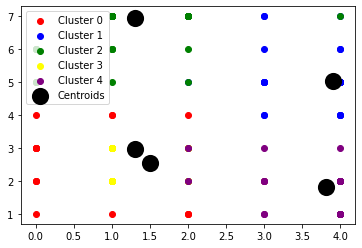

In [48]:
# Separando os dados por cluster
cluster0 = X.iloc[labels == 0, :]
cluster1 = X.iloc[labels == 1, :]
cluster2 = X.iloc[labels == 2, :]
cluster3 = X.iloc[labels == 3, :]
cluster4 = X.iloc[labels == 4, :]


# Criando uma lista ocm todos os clusters
clusters = [cluster0, cluster1, cluster2, cluster3, cluster4]

# Plotando os clusters em gráficos diferentes
plt.scatter(cluster0.iloc[:, 0], cluster0.iloc[:, 1], color='red', label='Cluster 0')
plt.scatter(cluster1.iloc[:, 0], cluster1.iloc[:, 1], color='blue', label='Cluster 1')
plt.scatter(cluster2.iloc[:, 0], cluster2.iloc[:, 1], color='green', label='Cluster 2')
plt.scatter(cluster3.iloc[:, 0], cluster3.iloc[:, 1], color='yellow', label='Cluster 3')
plt.scatter(cluster4.iloc[:, 0], cluster4.iloc[:, 1], color='purple', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, linewidths=3, color='black', zorder=10, label='Centroids')
plt.legend()
plt.show()

In [49]:
# Agora vamos ver quão satisfatório e bem definidos estão os clusteres
from sklearn.metrics import silhouette_score

# silhouette_score() retorna o valor do coeficiente de silhueta
silhouette_avg = silhouette_score(X, labels)
print("Coeficiente de Silhueta médio:", silhouette_avg)

Coeficiente de Silhueta médio: 0.6082346920666715


## Decobrindo o valor "ideal" de centroides

C:\Users\Pedro Mahfuz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


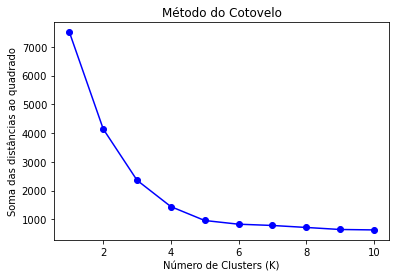

In [50]:
sum_of_squared_distances = []
# Executar o K-means para diferentes valores de K
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotar a soma das distâncias ao quadrado em função do número de clusters
plt.plot(k_values, sum_of_squared_distances, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma das distâncias ao quadrado')
plt.title('Método do Cotovelo')
plt.show()

In [51]:
# Removendo os valores Nan das colunas 'P1','P2','Qest','Qclasse' para poder adicionar o labels no dataframe
df = df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(subset=['P1','P2','Qest','Qclasse'], inplace=True)

# Adicionando uma coluna de clusterização no banco de dados
df['cluster'] = labels
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qs,Casado,Divorciado,Separado,Solteiro,Viúvo,A,B,C,cluster
0,2.0,7.0,7.0,5.0,4.0,2.0,6.0,7.0,5.0,1.0,...,Dados para Marketing,1,0,0,0,0,0,1,0,2
1,3.0,2.0,2.0,6.0,4.0,2.0,5.0,1.0,3.0,2.0,...,NaN,0,0,0,0,1,0,1,0,4
2,1.0,7.0,7.0,5.0,4.0,5.0,6.0,6.0,5.0,2.0,...,Dados para Hotel,1,0,0,0,0,0,1,0,2
3,1.0,3.0,4.0,4.0,6.0,6.0,1.0,7.0,6.0,6.0,...,Marketing,0,1,0,0,0,0,1,0,3
4,2.0,7.0,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,Dados para Hotel,1,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,3.0,7.0,6.0,6.0,6.0,2.0,4.0,7.0,5.0,...,Pesquisa Hotel,0,0,0,0,1,1,0,0,3
1264,1.0,3.0,7.0,7.0,5.0,3.0,6.0,6.0,5.0,2.0,...,Pesquisa,1,0,0,0,0,1,0,0,0
1265,2.0,7.0,6.0,6.0,4.0,5.0,6.0,6.0,5.0,1.0,...,Dados para Hotel,1,0,0,0,0,1,0,0,2
1266,2.0,3.0,5.0,5.0,6.0,5.0,7.0,6.0,5.0,2.0,...,Coleta de dados,1,0,0,0,0,1,0,0,0


# Analise da clusterização

<p>Considerando o Método do Cotovelo e coeficiente de silhueta concluimos que a melhor quantidade de clusters é 5</p>

In [52]:
# Frequência média de viagem de cada cluster
for i in range(5):
    print('Frequência média do cluster{}: {}'.format(i, clusters[i]['P1'].mean()))

Frequência média do cluster0: 1.304054054054054
Frequência média do cluster1: 3.9069767441860463
Frequência média do cluster2: 1.3045454545454545
Frequência média do cluster3: 1.506276150627615
Frequência média do cluster4: 3.8181818181818183


In [53]:
# Estadia média de cada cluster
for i in range(5):
    print('Estadia média do cluster{}: {}'.format(i, clusters[i]['Qest'].mean()))

Estadia média do cluster0: 3.3986486486486487
Estadia média do cluster1: 1.6046511627906976
Estadia média do cluster2: 3.4727272727272727
Estadia média do cluster3: 6.0
Estadia média do cluster4: 1.5324675324675325


In [54]:
# Classe de cada cluster (se é mais alta ou mais baixa)
for i in range(5):
    print('Classe do cluster{}: {}'.format(i, clusters[i]['Qclasse'].mean()))

Classe do cluster0: 1.4966216216216217
Classe do cluster1: 2.062015503875969
Classe do cluster2: 1.3818181818181818
Classe do cluster3: 1.2384937238493723
Classe do cluster4: 1.974025974025974


Após analisar os resultados da clusterização encontramos duas possiblidades de investimento diferentes e destacaram-se os clusters 1, 3 e 4. Primeiramente, percebemos que os clusters 1 e 4 eram muito semelhantes considerando a frequência média, a estadia média e a classe social. 

In [55]:
# Motivo da viagem do cluster1
tab = cluster1['P2'].value_counts(sort=False)
tab.to_frame()

,P2
5.0,117
4.0,6
7.0,3
6.0,3


In [56]:
# Motivo da viagem do cluster3
tab = cluster3['P2'].value_counts(sort=False)
tab.to_frame()

,P2
3.0,128
2.0,111
